


<h1 style='text-align: center;'> Lending Club Case Study </h1>
                                        

### Introduction:
<p style='text-align: justify;'> The consumer finance industry is highly competitive, and lending companies face various challenges. Identifying risky loan applicants and minimizing credit losses are major concerns for lending companies. Lending club case study aims to help a consumer finance company understand and mitigate the risk of loan defaults. We will use Exploratory Data Analysis (EDA) to gain insights into the factors that influence loan default. The main goal is to provide recommendations and suggestions to reduce credit losses and enhance the portfolio.</p> 

### Background:
<p style='text-align: justify;'>Lending Club is a consumer finance online marketplace that connects borrowers with investors. The company specializes in offering a wide range of loans to urban customers, business loans, including personal loans, and financing for medical procedures. The company operates as the largest online loan marketplace, offering lower interest rates through a convenient online interface. Their main business concern is minimizing credit losses caused by loans given to risky applicants who may default on payments.</p>

### Problem Statement:
<p style='text-align: justify;'>For lending companies, the largest source of financial loss is credit loss, which occurs when borrowers unable to pay or default on their loans. To reduce credit losses, the company aims to identify risky loan applicants. By utilizing EDA technique, the company intends to understand the driving factors or driver variables behind loan default, which are strong indicators of potential credit losses.

The company receives various loan applications and must make decisions on whether to approve or reject these applications. Two primary risks are associated with this decision:

Risk of Not Approving the Loan:<br>
If an applicant is likely to repay the loan, but not approving the loan results in a loss of business for the company.

Risk of Default:<br>
If an applicant is not likely to repay the loan (i.e., likely to default), approving the loan can lead to a financial loss for the company.</p>


### Objectives:
<p style='text-align: justify;'>The goal of this case study is to identify risky loan applicants by using exploratory data analysis (EDA). Our primary objective is to identify key leading indicators or driver variables in the dataset that contribute to loan defaults. The main target is to help in decision making of approval or rejection of loan applications to reduce credit loss by using EDA techniques to find driving factors which are strong indicators defaulting of loan. This knowledge can then be applied to portfolio management, risk assessment, and strategic decision-making.</p>

### Data Overview:
<p style='text-align: justify;'>The provided dataset contains complete loan data for all loans issued between 2007 and 2011. It includes information about loan applicants and the outcome of their loans, specifically whether they defaulted or not. The key data attributes include:

Loan Attributes:<br> Information related to the loan itself, such as loan amount, interest rate, term, grade, loan date and loan status etc.

Consumer Attributes:<br> Information about the loan applicants, including home ownership , employment length, state, and annual income etc.</p>

### Analysis Approach
<p style='text-align: justify;'>To tackle this problem effectively, I have established a structured data analysis approach.

1.Data Preprocessing: 
It includes cleaning and preparing the data for analysis, handling missing values, encoding categorical variables, dropping unnecessary columns and standardizing data.

2.Exploratory Data Analysis (EDA): Exploring the dataset to identify patterns, trends, and relationships in the dataset. This will involve univariate, bivariate, and multivariate analysis.

3.Visualizations: It includes creating visual representations of the data to facilitate a better understanding of the insights, trends and relationship.

4.Feature Importance: Identifying key variables that strongly influence loan default using statistical method Exploratory Data Analysis (EDA).

5.Insights and Recommendations: Summarizing the findings and providing recommendations to the company based on the analysis.</p>

### Python Code For Case Study:

#### Importing Python Libraries for Case Study:

In [ ]:
# Importing the necessary python libraries required for the case study
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import warnings
import plotly.express as px
# Suppressing  warnings
warnings.filterwarnings('ignore')

#### Loading and Exploring Loan Data:

In [ ]:
df=pd.read_csv(r"loan.csv")
df.head()
print("Data shape:", df.shape)

Data shape: (39717, 111)


#### Data Understanding:

In [ ]:
# Basic infomation about the dataframe:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [ ]:
# Analyzing the loan dataset to gather summary statistics, including the number of columns, rows, missing values, unique values, and duplicates.
## Number of total rows and columns
print('Total Number of Columns:',df.shape[1])
print('Total Number of Rows:',df.shape[0])
## Number of missing values
print('Total Number of Missing Values:',df.isnull().sum().sum())
## Number of duplicates
print('Total Number of Duplicates:',df.duplicated().sum())
## Number of unique values
print('Total Number of Unique Values:',df.nunique().sum())

Total Number of Columns: 111
Total Number of Rows: 39717
Total Number of Missing Values: 2263366
Total Number of Duplicates: 0
Total Number of Unique Values: 416800


In [ ]:
# Columns Index in the dataframe:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [ ]:
# Data types of each columns Index:
print(df.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [ ]:
# Description of the dataframe
print(df.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

### Data Cleaning and Manipulation:

#### Handling the null values in columns and rows

In [ ]:
#To examine and analyze missing values in the loan dataset, including the count of missing values per column and the percentage of missing values:
# Check for missing values and display:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [ ]:
# Calculate the percentage of missing values per column and sort them in descending order
missing_percentage = (df.isnull().sum() / df.shape[0] * 100).round(2)
print("Percentage of Missing Values in Descending Order:")
print(missing_percentage.sort_values(ascending=False))

Percentage of Missing Values in Descending Order:
verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [ ]:
#Removing Columns with High Null Values:
#Removing column with 40% or more null values:
df= df.loc[:,df.isnull().sum()/df.shape[0]*100<40]
# Display the shape of the dataframe after removing null values:
print("Data shape after removing null values:", df.shape)

Data shape after removing null values: (39717, 54)


In [ ]:
#Checking Column-wise Null Value Percentage:
#Calculate the percentage of null values per column and sort them in descending order:
null_percentage = (df.isnull().sum() / df.shape[0] * 100).round(2)
print("Column-wise Null Value Percentage:")
print(null_percentage.sort_values(ascending=False))

Column-wise Null Value Percentage:
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq               

In [ ]:
# Columns in the dataframe after removing 40% null value:
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


#### Removing Unnecessary Columns:

In [ ]:
#Removing Unnecessary Columns
df=df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','title','emp_title','desc','url','zip_code','member_id','funded_amnt_inv'],axis=1)
# To display the shape of the dataframe after removing columns:
print("Data shape after removing columns:", df.shape)

Data shape after removing columns: (39717, 26)


In [ ]:
# Checking very few unqiue values:
print(df.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [ ]:
# Removing Columns with Only One Unique Value:
df = df.loc[:, df.nunique() > 1]
# Display the shape of the dataframe after removing columns
print("Data shape after removing columns:", df.shape)
# Display the remaining columns in the dataframe
print("Total columns in the dataframe after removing:", df.columns)

Data shape after removing columns: (39717, 18)
Total columns in the dataframe after removing: Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


#### Fixing the null values:

In [ ]:
# To check missing values
print(df.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


In [ ]:
# Display value counts in the "emp_length" column:
print("Value Counts in 'emp_length' column:")
print(df.emp_length.value_counts())

# Display value counts in the "pub_rec_bankruptcies" column:
print("Value Counts in 'pub_rec_bankruptcies' column:")
print(df.pub_rec_bankruptcies.value_counts())

Value Counts in 'emp_length' column:
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
Value Counts in 'pub_rec_bankruptcies' column:
pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


In [ ]:
# Remove null values in the "emp_title" and "emp_length" and checking shape
df = df.dropna(subset=['emp_length'])
print("Data shape after removing null values:", df.shape)


Data shape after removing null values: (38642, 18)


In [ ]:
# Inserting 0 for null values in pub_rec_bankruptcies column and checking missing values
df.pub_rec_bankruptcies.fillna(0,inplace=True)
print("Missing Values after filling null values in 'pub_rec_bankruptcies':")
print(df.isnull().sum())

Missing Values after filling null values in 'pub_rec_bankruptcies':
id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [ ]:
# Remove duplicate rows in the dataframe
df = df.drop_duplicates()
# Display the shape of the dataframe after removing duplicates
print("Data shape after removing duplicates:", df.shape)

Data shape after removing duplicates: (38642, 18)


#### Investigating, Correcting Data Types, and Deriving New Columns:

In [ ]:
# Display information about the dataframe:
print("New Dataframe Information:")
print(df.info())

New Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 1

#### Data Type Conversion and Cleaning:

In [ ]:
#Data type conversion:
df.grade=df.grade.astype('category')
df.sub_grade=df.sub_grade.astype('category')
df.verification_status=df.verification_status.astype('category')
df.addr_state=df.addr_state.astype('category')
df.purpose=df.purpose.astype('category')
df.home_ownership=df.home_ownership.astype('category')

In [ ]:
#Data type conversion:
df.term=df.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
df.int_rate=df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
df.emp_length=df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

In [ ]:
#Data type conversion:
df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year
df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')

In [ ]:
# To set floating point for all data: 
for x in df.columns:
    if(df[x].dtype=='float64'):
      df[x]=df[x].round(2)
      
df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0,2011,12


#### Data Manupulation After Data Type Conversion:

In [ ]:
# Removing 'Current' loan status and calculating shape:
df= df[df.loan_status!='Current']
# Display the shape of the dataframe after removal:
print("Data shape after removing 'Current' loan status:", df.shape)

Data shape after removing 'Current' loan status: (37544, 20)


In [ ]:
# To select columns based on domain:
df= df[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Display the shape of the resulting dataframe:
print("Data shape after selecting columns for analysis:", df.shape)

Data shape after selecting columns for analysis: (37544, 17)


In [ ]:
# Categorizes the columns from the loan dataset into different groups based on their nature:
categorical = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
numerical=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_no=['id']
final_result=['loan_status']

### Outliers Treatment:

In [ ]:
## To remove outliers in annual_inc greater than 99th percentile
df = df[df.annual_inc<=np.percentile(df.annual_inc,99)]

### EDA Analysis:

### Univariate Analysis:

loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64


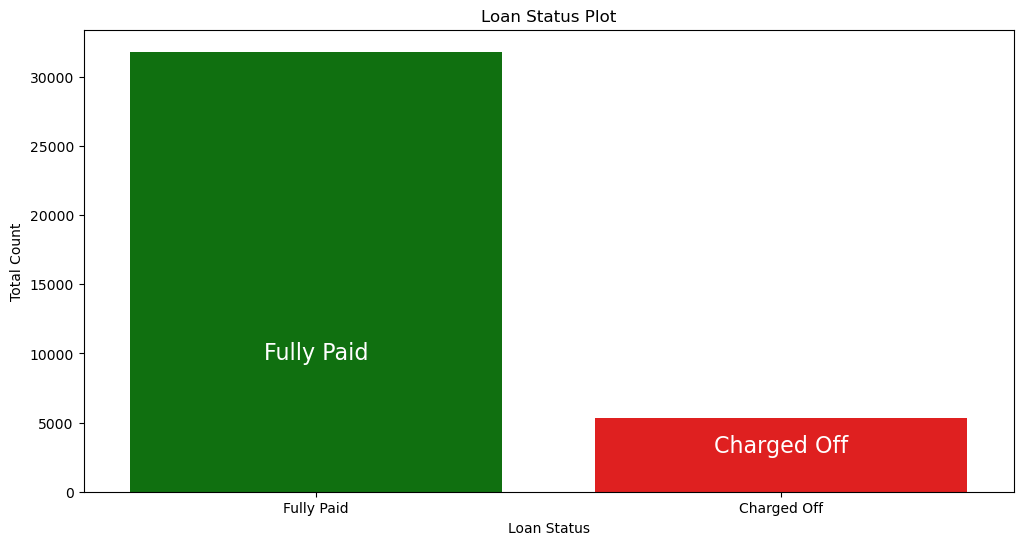

In [ ]:
# To calculate and print the percentage of each loan status:
loan_status_percentage = df.loan_status.value_counts() * 100 / df.loan_status.count()
print(loan_status_percentage)

#To create a figure and axis for the count plot:
plt.figure(figsize=(12, 6))
colors = ['green', 'red']
a = sns.countplot(data=df, x='loan_status', palette=colors)
# Annotate the plot with labels for Fully Paid and Charged Off:
a.annotate('Fully Paid', xy=(0.25, 0.3), xycoords='axes fraction', horizontalalignment='center', verticalalignment='center', fontsize=16, color='white')
a.annotate('Charged Off', xy=(0.75, 0.1), xycoords='axes fraction', horizontalalignment='center', verticalalignment='center', fontsize=16, color='white')

# To set plot title, x-axis label, and y-axis label:
a.set_title('Loan Status Plot')
a.set_xlabel('Loan Status')
a.set_ylabel('Total Count')
plt.show()

#### Observations: The proportion of defaulted loans is less than fully paid.

In [ ]:
# To display summary statistics for the loan amount:
print("Loan Amount Summary Statistics:")
print(df.loan_amnt.describe())

Loan Amount Summary Statistics:
count    37173.000000
mean     11034.824335
std       7272.289190
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [ ]:
# Create a box plot for the loan amount:
px.box(df, x='loan_amnt', width=1000, height=450, title='Box Plot of loan amount:', labels={'loan_amnt': 'Loan Amount'}).show()

#### Observations: The range of loan amounts spans from 500 to 35,000, with an average value of 10,000.

Loan Term Percentage:
term
36    75.37729
60    24.62271
Name: count, dtype: float64


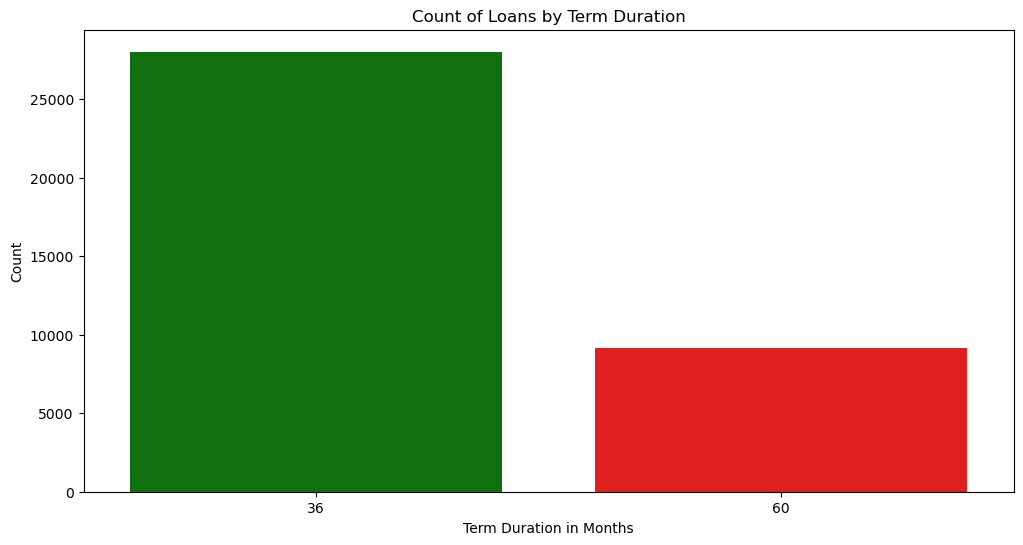

In [ ]:
# Analyzing Term Of loan:
term_percentage = df.term.value_counts() * 100 / df.term.count()
print("Loan Term Percentage:")
print(term_percentage)
plt.figure(figsize=(12, 6))
colors = ['green', 'red']
loan_term_count_plot = sns.countplot(data=df, x='term', palette=colors)
loan_term_count_plot.set_title('Count of Loans by Term Duration')
loan_term_count_plot.set_xlabel('Term Duration in Months')
loan_term_count_plot.set_ylabel('Count')
plt.show()



#### Observations: A majority of loans are for a 36 month terms compared to 60-month terms.

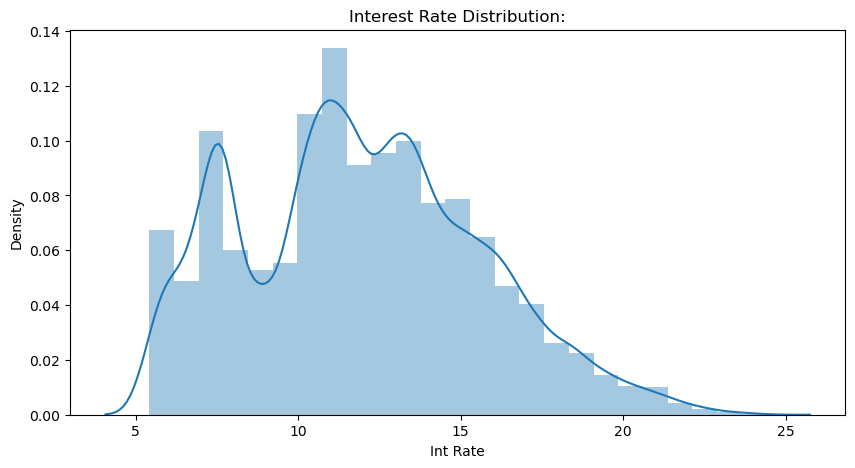

In [ ]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(df.int_rate),bins=25)
plt.xlabel('Int Rate')
plt.ylabel('Density')
plt.title('Interest Rate Distribution:')
plt.show()

#### Observations: The interest rates are primarily concentrated around the 5-10 and 10-15 ranges, with a noticeable decline in frequency near 10.

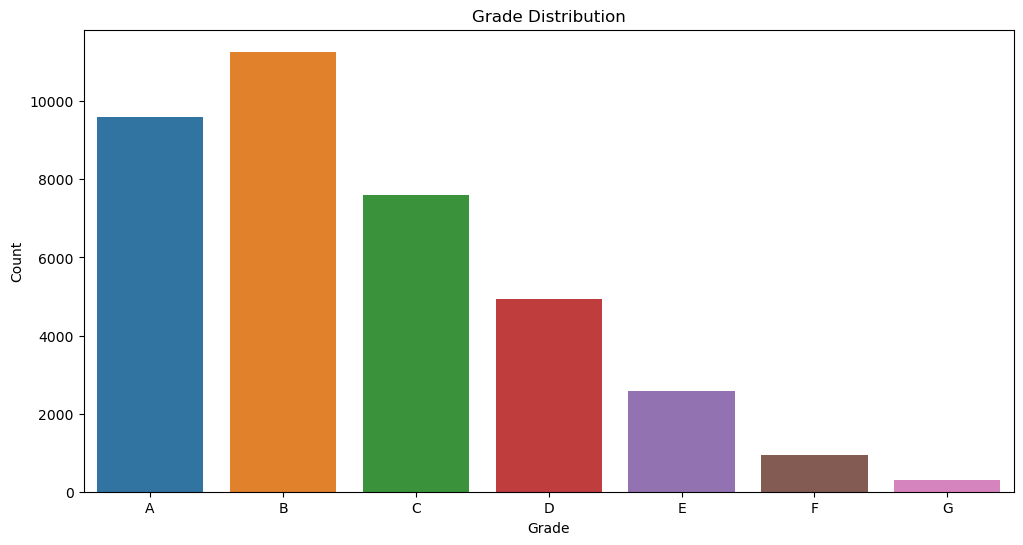

In [ ]:
# Grade Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.show()


#### Observations: The majority of loans are classified under grades 'A' and 'B,' which implies that the majority of loans belong to the high-grade category.

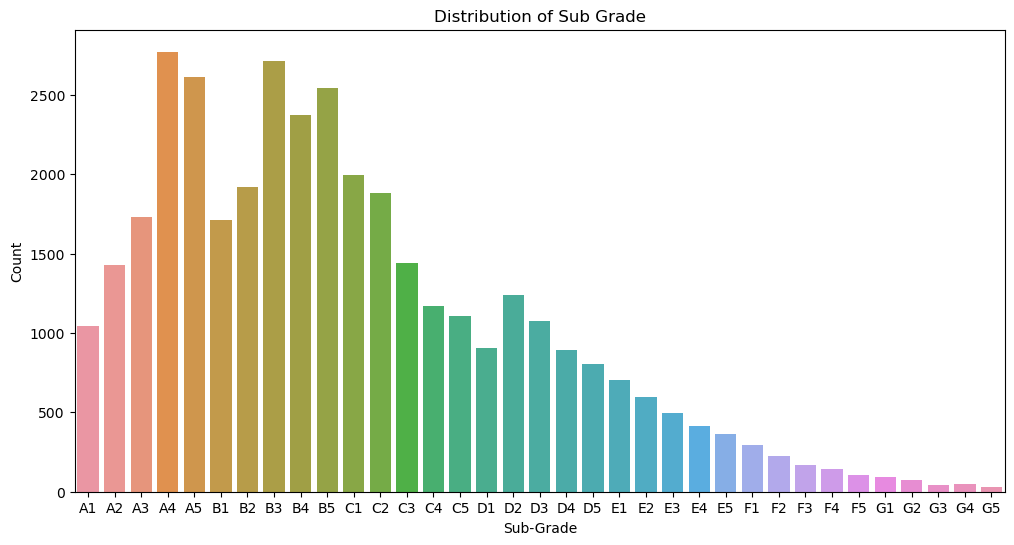

In [ ]:
# Sub-Grade Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sub_grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.title('Distribution of Sub Grade')
plt.show()


#### Observations: Most loans belong to high-grade categories 'A' and 'B.'

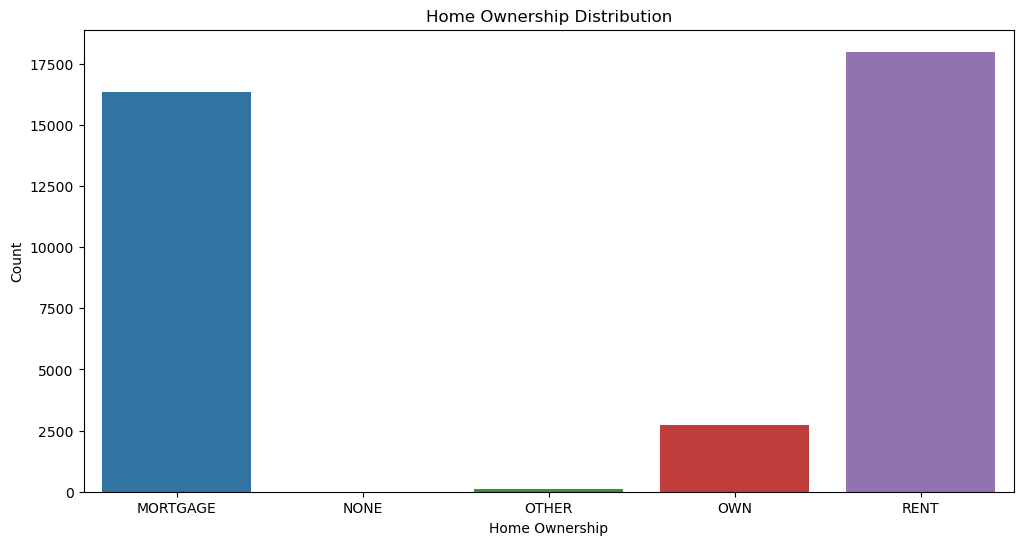

In [ ]:
# Distribution of home ownership
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='home_ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership Distribution', fontsize=12)
plt.show()


#### Observations: Most borrowers do not own property, instead they are either in the mortgage or rental category.

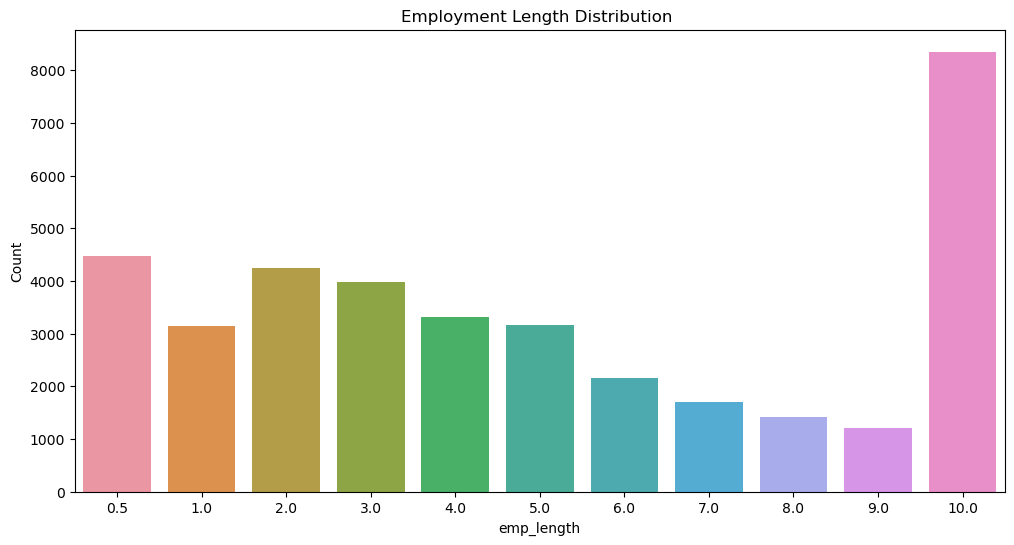

In [ ]:
# Distribution of Employment Length
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='emp_length')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('Employment Length Distribution ', fontsize=12)
plt.show()

#### Observations: The majority of borrowers have over a decade of work experience.

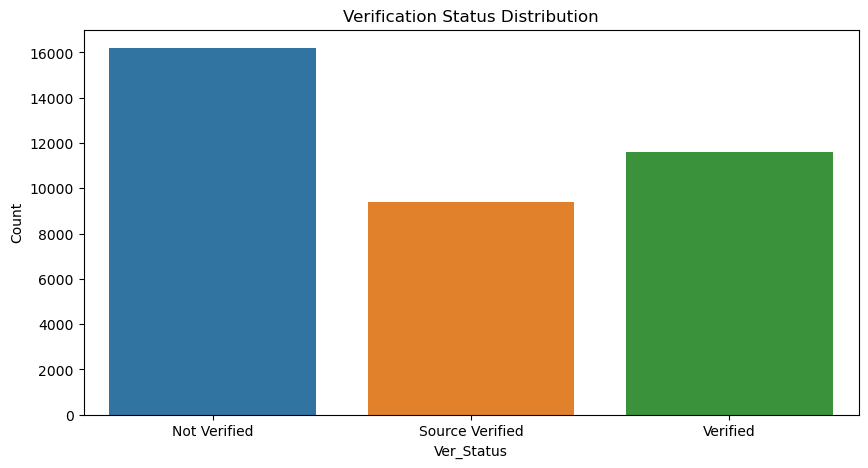

In [ ]:
# verification_status Distribution:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='verification_status')
plt.xlabel('Ver_Status')
plt.ylabel('Count')
plt.title('Verification Status Distribution', fontsize=12)
plt.show()


#### Observations: Roughly half of the borrowers either undergo verification by the company or have their background source verified.

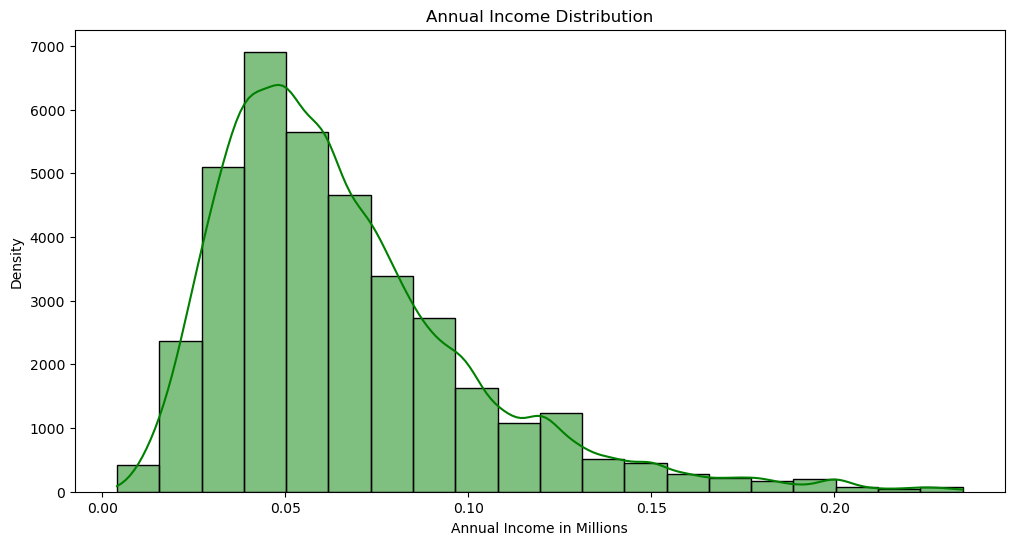

In [ ]:
# Distribution of Annual Income
plt.figure(figsize=(12, 6))
sns.histplot(data=df,x=df.annual_inc/1000000, bins=20, kde=True, color='green')
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Annual Income Distribution', fontsize=12)
plt.show()



#### Observations: The distribution of annual income exhibits a left-skewed normal pattern, suggesting that the majority of borrowers have significantly lower annual incomes compared to the remaining population.

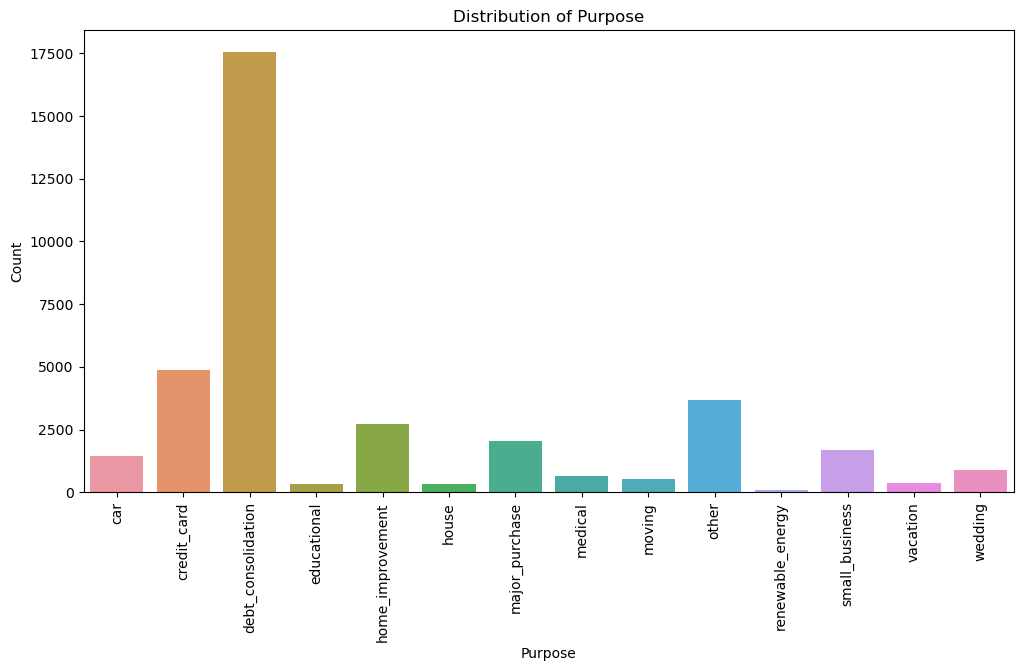

In [ ]:
# Purpose Distribution
plt.figure(figsize=(12,6))
sns.countplot(x=df.purpose)
plt.ylabel('Count')
plt.xlabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Observations: The majority of loans are used for debt consolidation, with credit card-related loans as the second most common purpose.

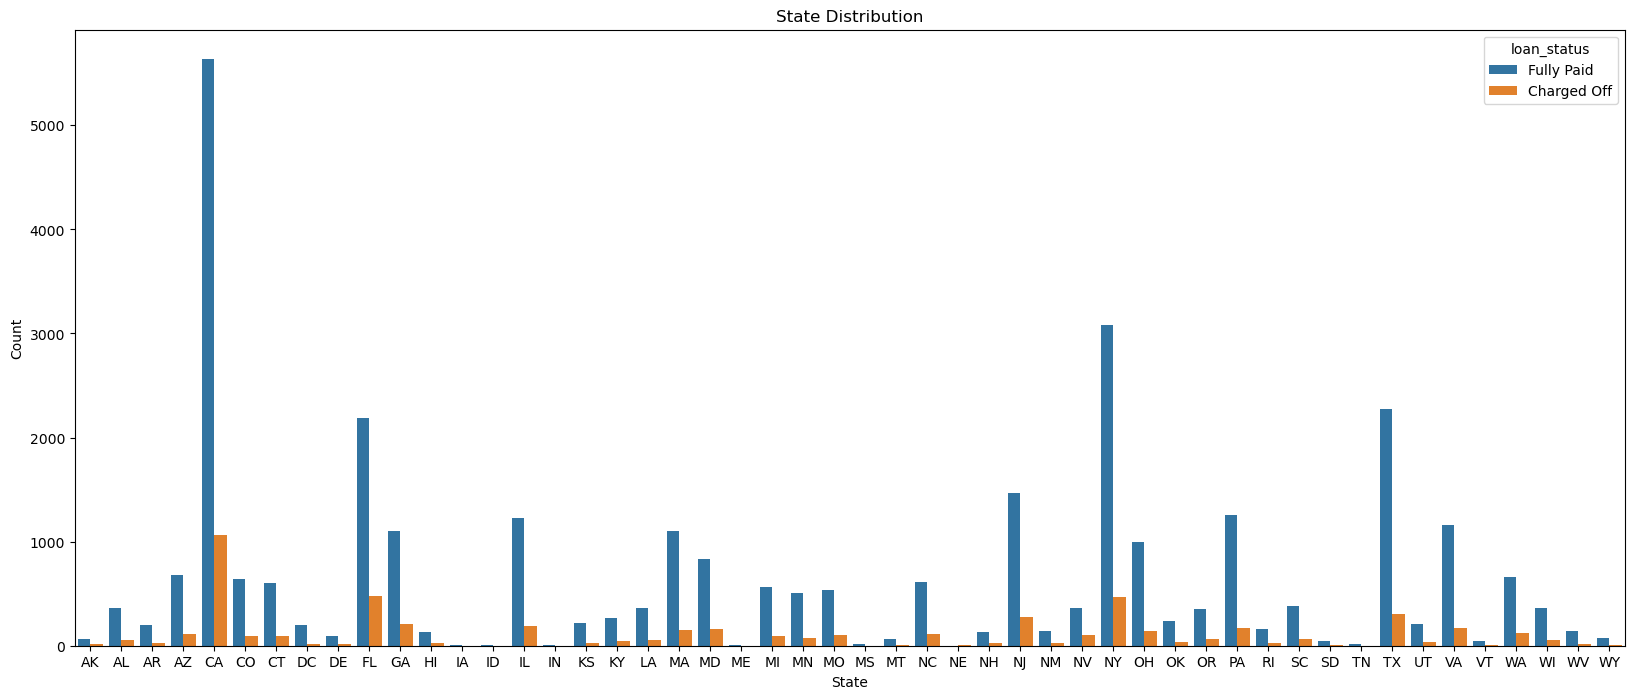

In [ ]:
# Distribution of addr_state
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='addr_state', hue='loan_status')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Distribution', fontsize=12)
plt.show()


#### Observations: Most borrowers originate from major urban areas such as California, New York, Texas, Florida, and others.

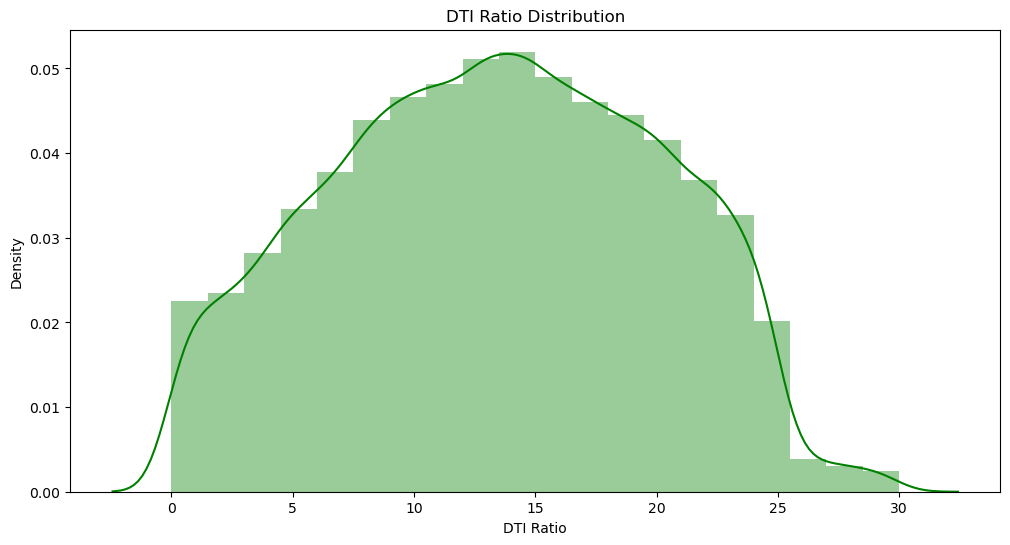

In [ ]:
# Distribution of dti:
plt.figure(figsize=(12,6))
sns.distplot(df.dti,kde=True,bins=20, color='green')
plt.xlabel('DTI Ratio')
plt.ylabel('Density')
plt.title('DTI Ratio Distribution',fontsize=12)
plt.show()

#### Observations: The majority of borrowers have significantly high debt in relation to their registered income, with a concentration within the 10-15 DTI ratio range.

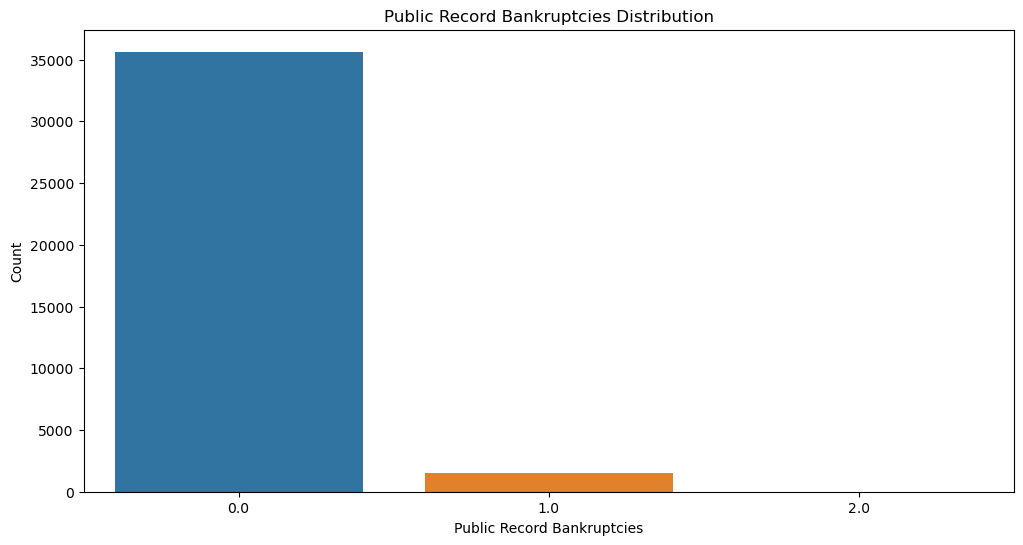

In [ ]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pub_rec_bankruptcies')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.title('Public Record Bankruptcies Distribution', fontsize=12)
plt.show()


#### Observations: The majority of borrowers do not have any recorded history of bankruptcy in the public records.

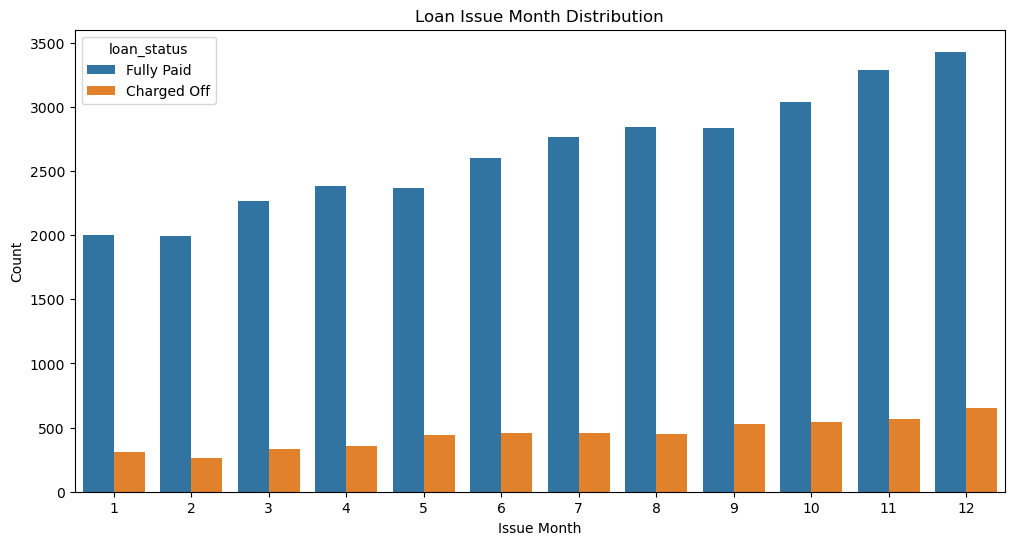

In [ ]:
# Distribution of issue_month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='issue_month', hue='loan_status')
plt.xlabel('Issue Month')
plt.ylabel('Count')
plt.title('Loan Issue Month Distribution', fontsize=12)
plt.show()


#### Observations: Most loans are distributed during the last quarter of the year.

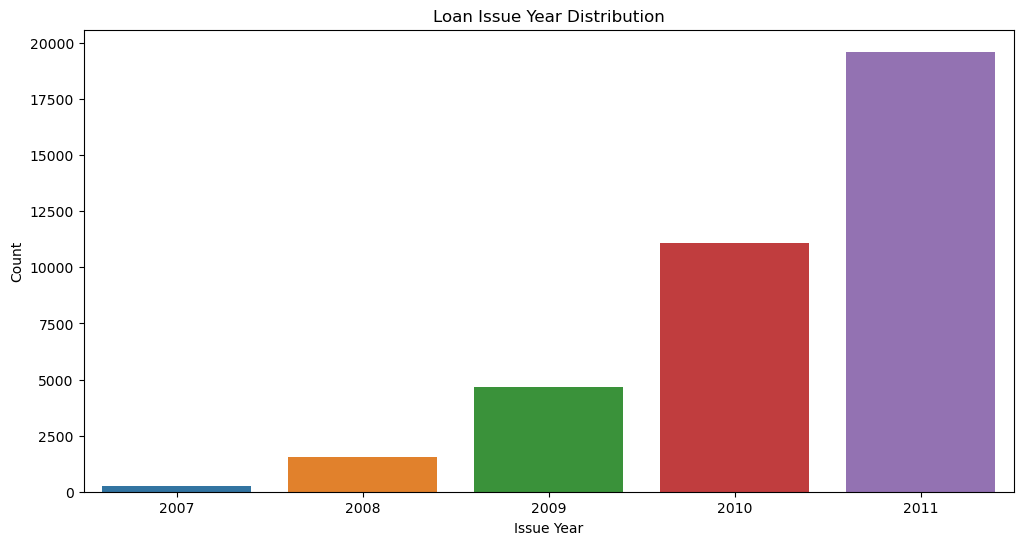

In [ ]:
# Distribution of issue_year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='issue_year')
plt.xlabel('Issue Year')
plt.ylabel('Count')  # Change 'Density' to 'Count'
plt.title('Loan Issue Year Distribution', fontsize=12)
plt.show()


#### Observations: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis:

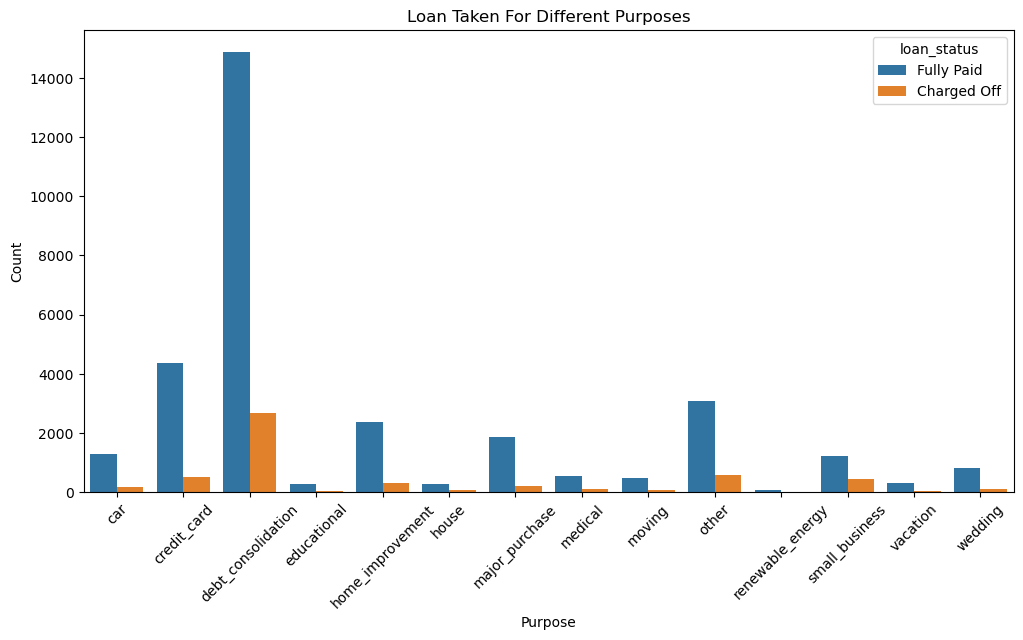

In [ ]:
# Distribution of purpose vs loan_status:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Loan Taken For Different Purposes', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#### Observations: Debt consolidation is the most common loan purpose and has the highest number of both fully paid and defaulted loans.

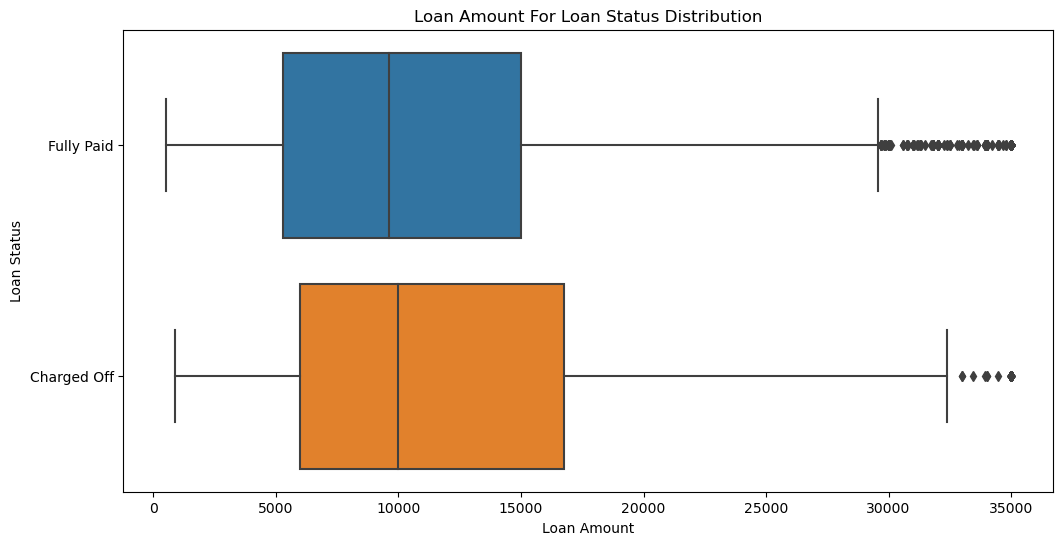

In [ ]:
# Distribution of loan_amnt vs loan_status:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='loan_amnt', y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Loan Amount For Loan Status Distribution', fontsize=12)
plt.show()


#### Observations: The mean and 25th percentile values are similar for both fully paid and defaulted loans, but the 75th percentile in defaulted loans is noticeably higher. This discrepancy implies that larger loan amounts have a higher likelihood of defaulting.

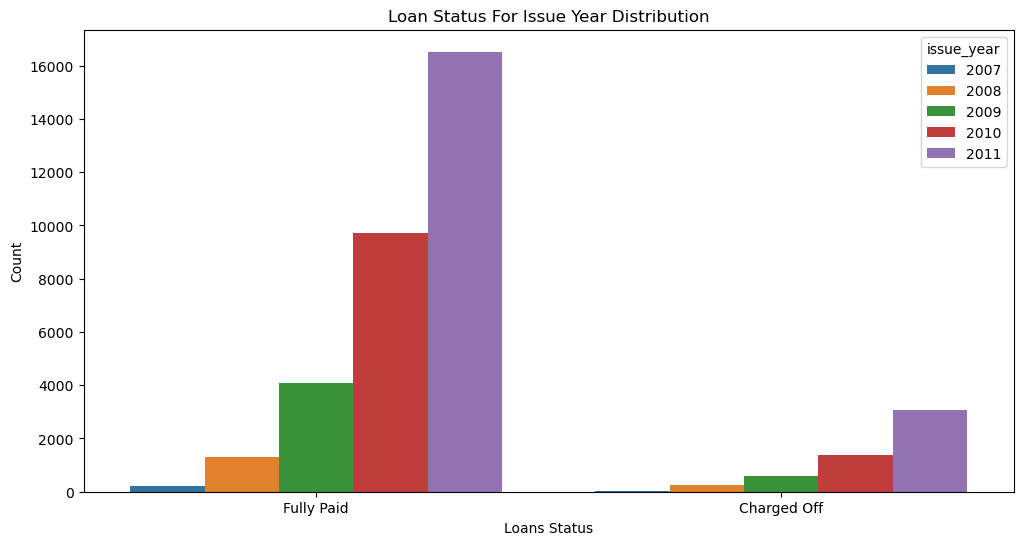

In [ ]:
# Distribution of loan_status Vs issue_year:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Loan Status For Issue Year Distribution',fontsize=12)
plt.show()

#### Observations: The number of fully paid loans is growing exponentially over time when compared to defaulted loans.

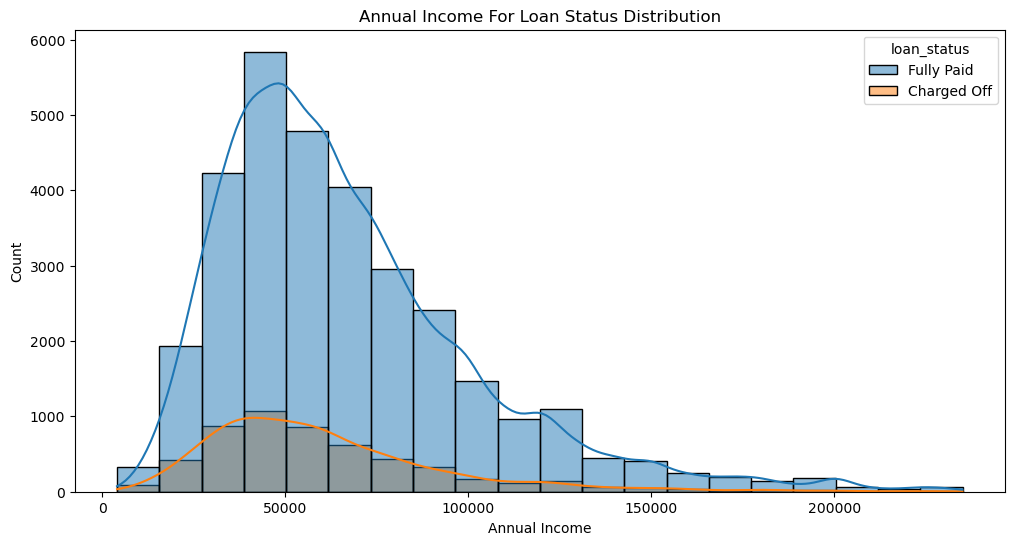

In [ ]:
# Distribution of annual_inc Vs loan_status
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income For Loan Status Distribution',fontsize=12)
plt.show()

#### Observations: Borrowers with annual incomes below 50,000 are more likely to default, while those with higher annual incomes are less likely to default.

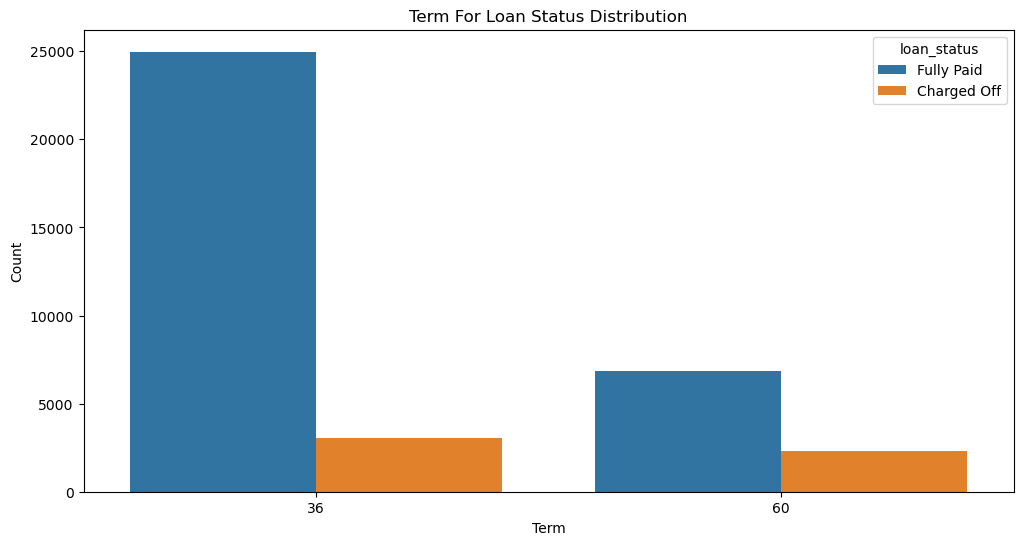

In [ ]:
# Distribution of Term based on loan_status:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term For Loan Status Distribution',fontsize=12)
plt.show()

#### Observations: Loans with a 60 months term are more likely to default compared to those with a 36 months term, while 36 months term loans have a higher likelihood of being fully paid.

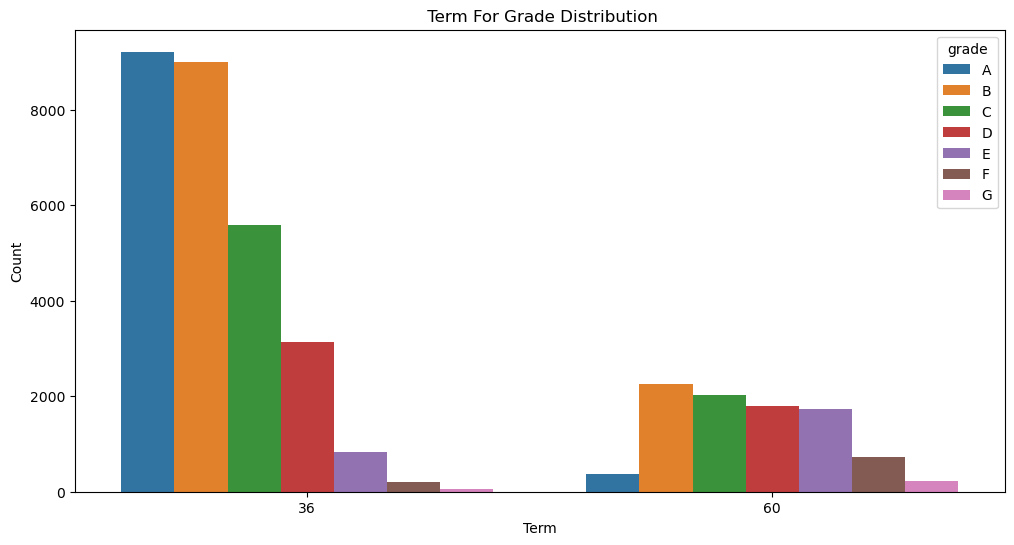

In [ ]:
# Distribution of Term Vs Grade
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title(' Term For Grade Distribution',fontsize=12)
plt.show()

#### Observations: The majority of loans with a 36 months term are in grade A and B, while those with a 60 months term are primarily in grade B, C, and D.

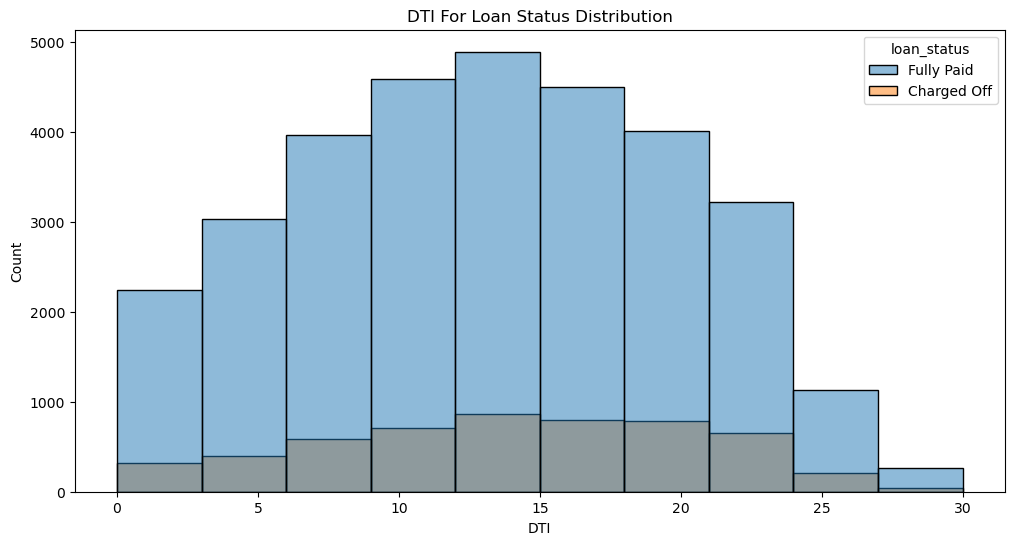

In [ ]:
# Distribution of DTI based on Grade
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('DTI For Loan Status Distribution',fontsize=12)
plt.show()

#### Observations: The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

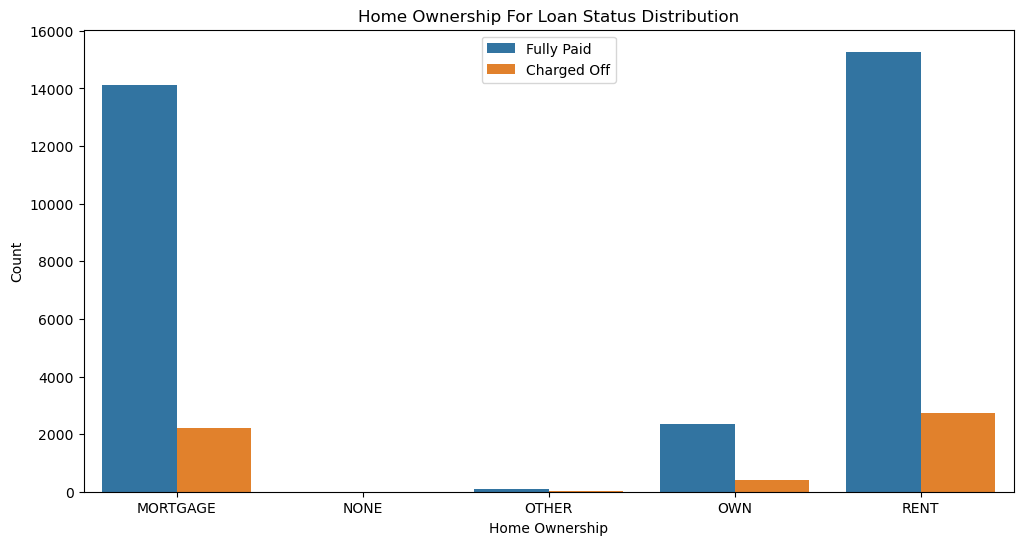

In [ ]:
# Distribution of house_ownership Vs loan_status
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership For Loan Status Distribution',fontsize=12)
plt.legend(loc='upper center')
plt.show()

#### Observations: Defaulted loan are lower for the burrowers which own their property in comparison to mortgage or rent.

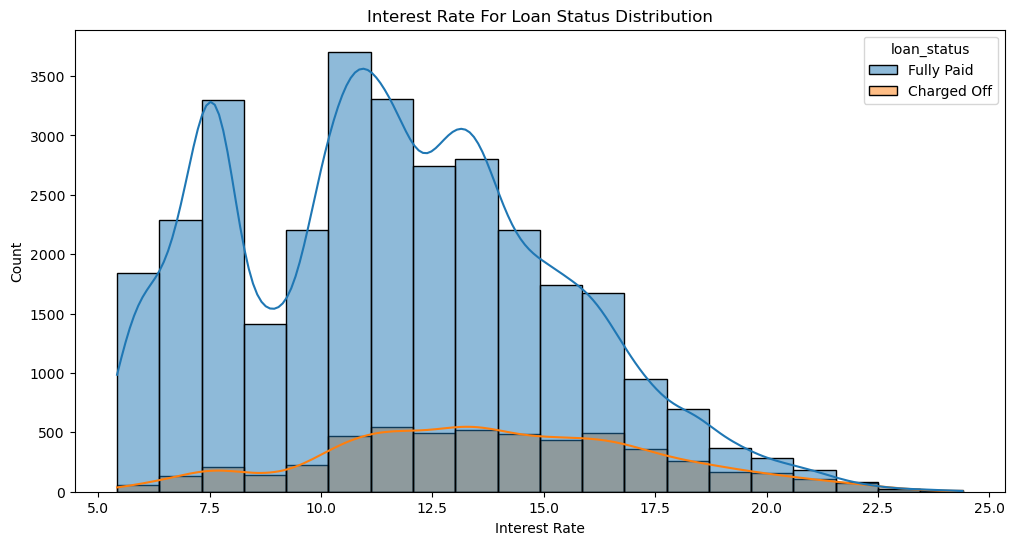

In [ ]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Interest Rate For Loan Status Distribution',fontsize=12)
plt.show()

#### Observations: The default loan amount tends to rise with increasing interest rates, but it shows a decline after reaching a peak around 17.5%.

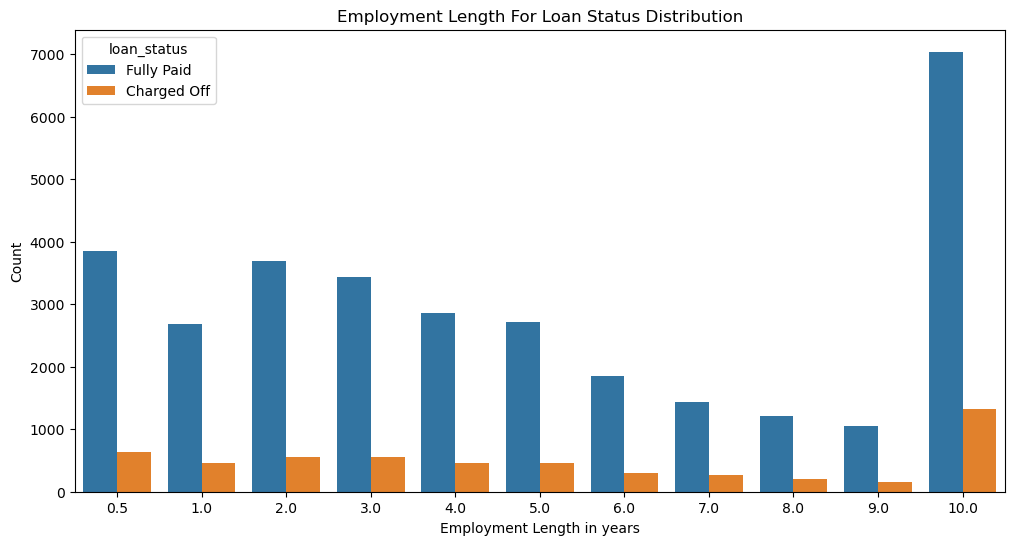

In [ ]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Employment Length For Loan Status Distribution',fontsize=12)
plt.show()

#### Observations: Employees with over 10 years of experience are more likely to default on their loans, but they also have a higher probability of fully repaying them.

### Bivariate Analysis:

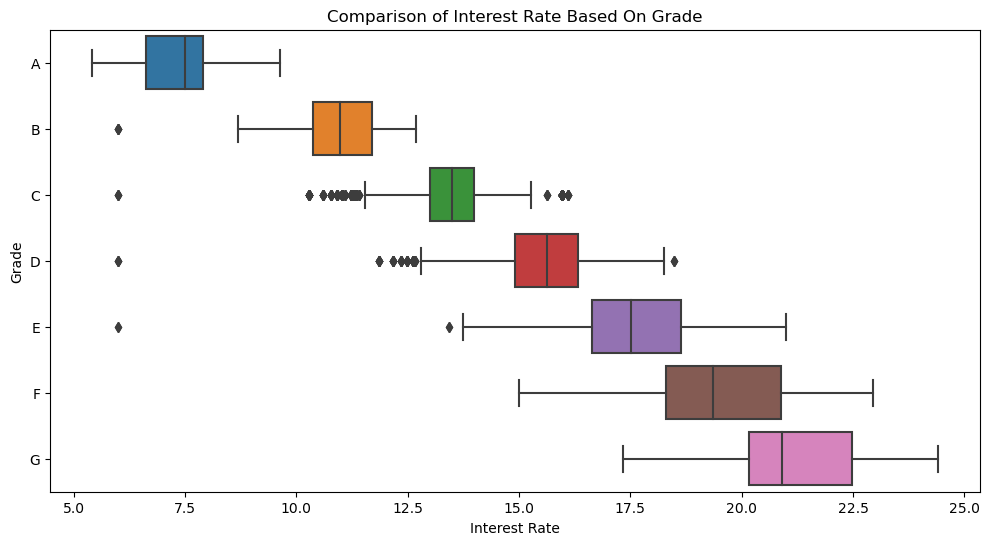

In [ ]:
# Comparison of interest rate based on grade
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

#### Observations: The grade assigned to loans represents a risk factor, and it is evident that interest rates increase with higher risk grades, indicating a positive correlation between interest rates and risk.

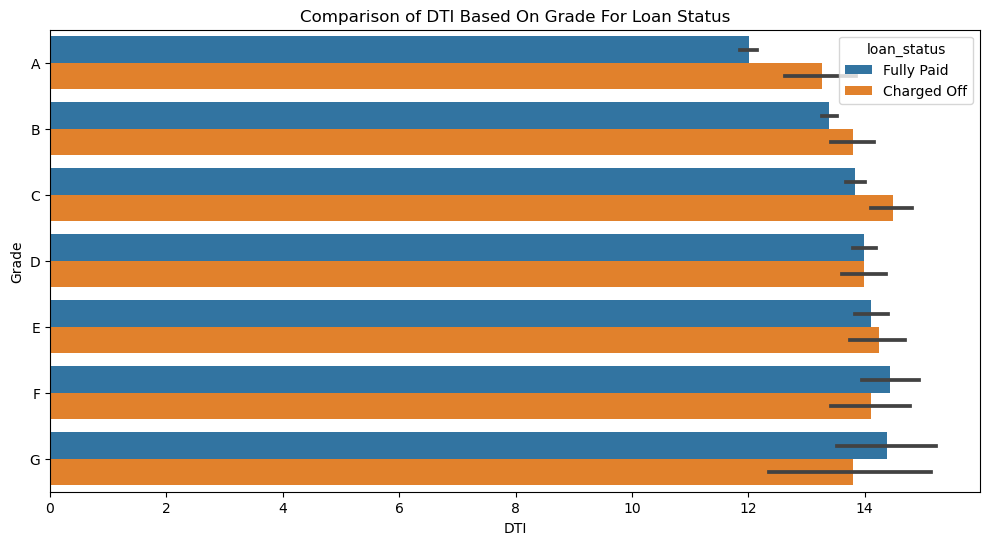

In [ ]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

#### Observations: Grade A loans, associated with the lowest risk, also have the lowest Debt to Income (DTI) ratios, indicating that higher-grade loans have a lower default rate.

<Figure size 1000x500 with 0 Axes>

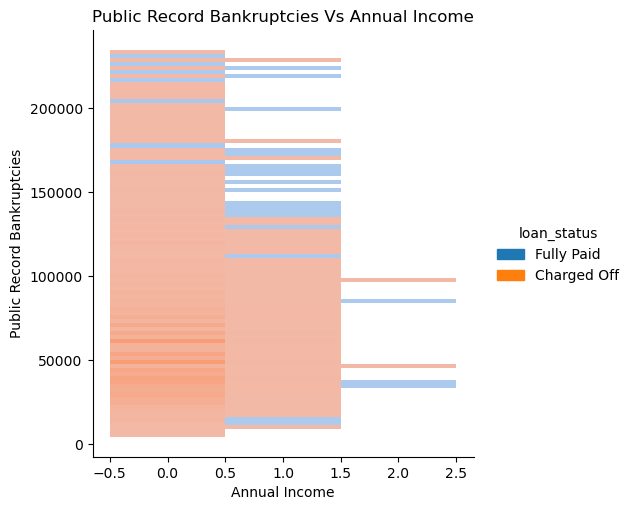

In [ ]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(x=df.pub_rec_bankruptcies.astype('category'),y=df.annual_inc,hue=df.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()


#### Observations: The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

### Correlation Analysis:

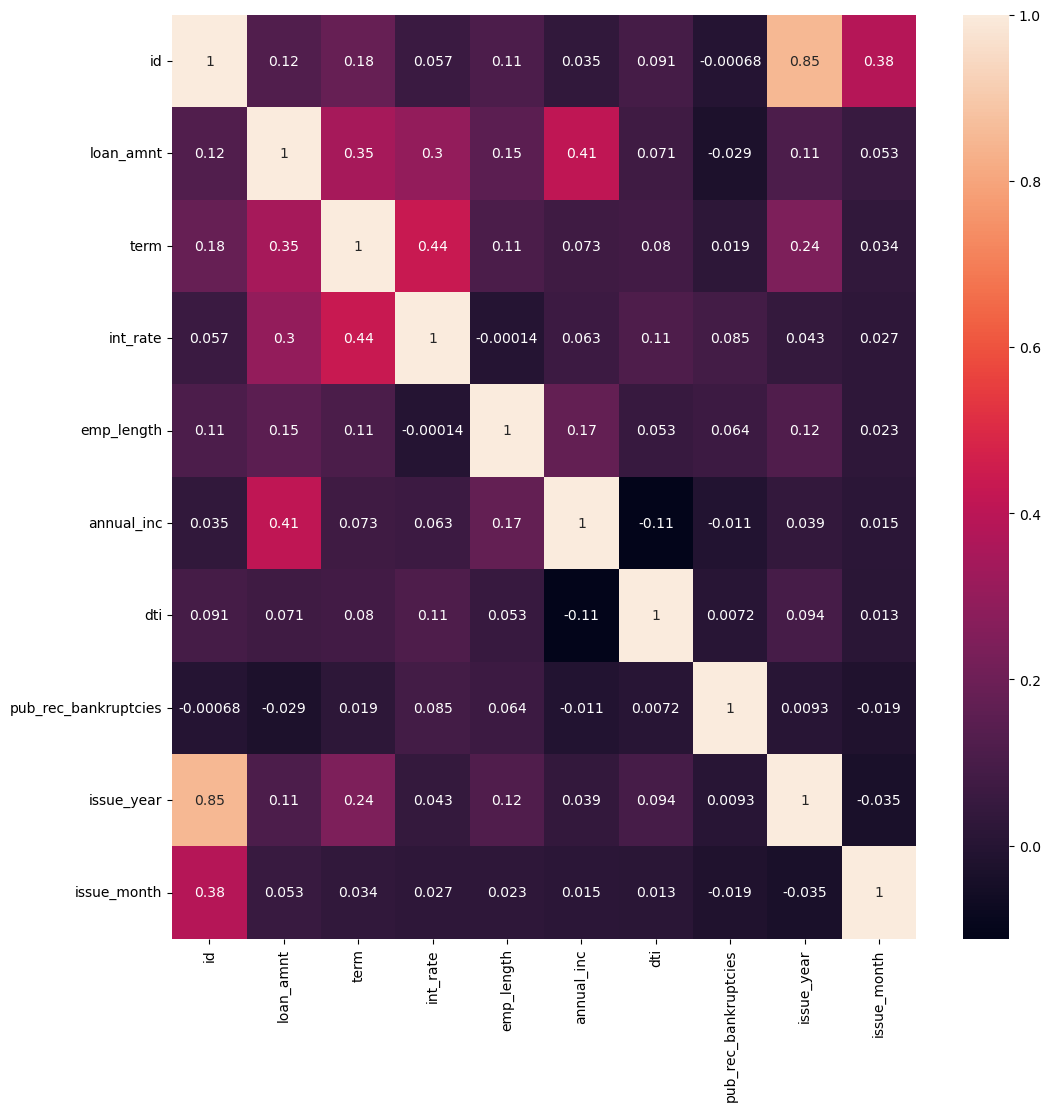

In [ ]:
# Filter only numeric columns in the DataFrame
numeric_df = df.select_dtypes(include=['number'])
# To specify the colormap
colormap = 'coolwarm'

# Heatmap of correlation between numeric variables
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap=colormap)
plt.show()

### Conclusion and Recommendations:

### Conclusion:
<p style='text-align: justify;'> The key factors which can be used for predicting default and minimizing credit losses in lending include grades, Debt-to-Income ratio (DTI), verification status, annual income, and public record bankruptcies. Additionally,borrowers with over a decade of work experience, lower annual incomes, a history of public-recorded bankruptcies,high Debt-to-Income ratios, lower grades (E, F, G), and those located in non-urban regions are more likely to default on their loans.</p>

### Recommendations:
To minimize credit losses and improve lending practices, it is recommended to:

1. Focus on borrowers with lower DTI ratios, as they tend to have a lower risk of default<br>
2. Prioritize borrowers with higher grades, as they are less likely to default<br>
3. Exercise caution when lending to borrowers with over a decade of work experience<br>
4. Pay special attention to borrowers with lower credit grades (E, F, G) due to their increased risk<br>
5. Evaluate loans in non-urban regions more carefully<br>
6. Be cautious when dealing with borrowers who have a history of public-record bankruptcies<br>

### Technologies Used:
Programming Language:<br>
- Python, version 3 for data analysis and manipulation

Libraries and Tools:<br>
- NumPy for numerical computations 
- Matplotlib and Seaborn for data visualization
- Pandas for data manipulation
- Jupyter Notebook for interactive analysis

### Acknowledgements and References:
Acknowledgements:<br>
I acknowledge and appreciate the valuable course materials from upGrad and IIIT-B, which enhanced my understanding of data analysis and EDA.

References:<br>
- Python documentations
- Exploratory Data Analysis
- Stack Overflow

### Contact: Shishir Khanal
Created by https://github.com/Erkhanal - feel free to contact !
